In [32]:
import cv2
import numpy as np
from skimage import io, img_as_float, img_as_ubyte
import matplotlib.pyplot as plt

#Direktori gambar. Silakan menggunakan gambar apapun.
dir = "suzume x daijin.jpg"
colors = ("r","g","b")

img_opencv = cv2.imread(dir)
img_skimage= io.imread(dir) #Membuka gambar dengan Skimage

In [33]:
print("The shape of the image is ", img_opencv.shape)
height, width, color = img_opencv.shape

The shape of the image is  (4093, 2894, 3)


In [34]:
def convert(arr ,h, w):
    # hh = h//2
    hw = w//2
    for i in range(0, h):
        for j in range(0, hw):
            (b1, g1, r1) = arr[i][hw-j-1]
            (b2, g2, r2) = arr[i][hw+j]
            if (b1 != r1 | b2 != r2):
                arr[i][hw-j-1] = (r1, g1, b1)
                arr[i][hw+j] = (r2, g2, b2)

In [2]:
def swap_red_and_blue_cs(arr ,h, w):
    for i in range(0, h):
        for j in range(0, w):
           (b1, g1, r1) = arr[i][w]
           if (b1 != r1):
                arr[i][j] = (r1, g1, b1)

In [35]:
def main():
    fig, ax =plt.subplots(2, 2)
    imgplot=ax[0,0].imshow(img_opencv)
    ax[0,0].set_title("Image loaded with OpenCV")
    imgplot2=ax[0,1].imshow(img_skimage)
    ax[0,1].set_title("Image loaded with Scikit Image")
    for i, j, k in zip(range (3), colors,range (3)):
        histogram_ocv, bin_edges_ocv = np.histogram(
        img_opencv[ :, :, i], bins=256, range=(0, 256)
    )
        histogram_skimage, bin_edges_skimage = np.histogram(
        img_skimage[:, :, k], bins=256, range=(0, 256)
    )
        ax[1,0].plot(bin_edges_ocv[0:-1], histogram_ocv, color=j)
        ax[1,1].plot(bin_edges_skimage[0:-1], histogram_skimage, color=j)
    plt.show()

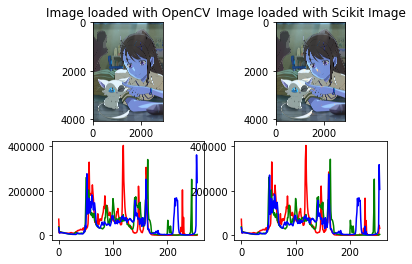

In [36]:
if __name__== "__main__":
    convert(img_skimage, height, width)
    main()